In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2025-01-01')

# SPX 500

In [75]:
# S&P 500 SPX monthly index from 1959
#csv_file = 'https://data.nasdaq.com/api/v3/datasets/MULTPL/SP500_REAL_PRICE_MONTH.csv?start_date=1959-01-01'
#local_file = '../data/spx_PriceMonthly.csv'
local_file = '../data/spx_HistoricalData.csv'
#max_age = datetime.timedelta(days=1)
#if not os.path.exists(local_file) or datetime.datetime.now() - datetime.datetime.fromtimestamp(os.path.getmtime(local_file)) > max_age:
#    import urllib.request
#    urllib.request.urlretrieve(csv_file, local_file)
dfSpx = pd.read_csv(local_file, encoding='cp1252')    

In [76]:
dfSpx.rename(columns={'Close/Last': 'Price'}, inplace=True)
dfSpx['Date'] = pd.to_datetime(dfSpx['Date'])
dfSpx.set_index('Date', inplace=True)
dfSpx.sort_values(by='Date', ascending=True, inplace=True)
dfSpx.tail()

,Price,Open,High,Low
Date,,,,
2023-11-30,4567.80,4554.87,4569.89,4537.24
2023-12-01,4594.63,4559.43,4599.39,4554.71
2023-12-04,4569.78,4564.37,4572.37,4546.72
2023-12-05,4567.18,4557.25,4578.56,4551.68
2023-12-06,4549.34,4586.23,4590.74,4546.50


In [77]:
dfSpx['YoY Change'] = dfSpx['Price'].pct_change(periods=252) *100
dfSpx['3 Yr Rolling Avg'] = dfSpx['YoY Change'].rolling(window=(252*3), min_periods=1).mean()
dfSpx = dfSpx.loc[dfSpx.index >= start_date]
dfSpx.tail()

,Price,Open,High,Low,YoY Change,3 Yr Rolling Avg
Date,,,,,,
2023-11-30,4567.80,4554.87,4569.89,4537.24,15.417561,11.834155
2023-12-01,4594.63,4559.43,4599.39,4554.71,12.610444,11.830594
2023-12-04,4569.78,4564.37,4572.37,4546.72,12.098652,11.823294
2023-12-05,4567.18,4557.25,4578.56,4551.68,12.168873,11.814767
2023-12-06,4549.34,4586.23,4590.74,4546.50,13.766492,11.809436


# TSLA

In [78]:
# Daily TSLA index for 10 years from 2013
# https://www.nasdaq.com/market-activity/index/tsla/historical  < NO! DOES NOT INC SPLIT ADJUSTED CLOSE! USE YAHOO!
# https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1701907200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
# Select max date range and download csv file
csv_file = '../data/tsla_HistoricalData.csv'
dfTsla = pd.read_csv(csv_file, encoding='cp1252', usecols=['Date', 'Adj Close'])


In [79]:
#dfTsla.rename(columns={'Price': 'Pre-split Price'}, inplace=True)
dfTsla.rename(columns={'Adj Close': 'Price'}, inplace=True)
dfTsla['Date'] = pd.to_datetime(dfTsla['Date'])
dfTsla.set_index('Date', inplace=True)
dfTsla.sort_values(by='Date', ascending=True, inplace=True)
dfTsla.head()

,Price
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [80]:
# weekly change Year over Year
dfTsla['YoY Change'] = dfTsla['Price'].pct_change(periods=252) * 100
dfTsla['3 Yr Rolling Avg'] = dfTsla['YoY Change'].rolling(window=(252*3)).mean()
dfTsla = dfTsla.loc[dfTsla.index >= start_date]
dfTsla.head()

,Price,YoY Change,3 Yr Rolling Avg
Date,,,
2012-01-03,1.872000,5.484578,NaN
2012-01-04,1.847333,3.899494,NaN
2012-01-05,1.808000,1.080861,NaN
2012-01-06,1.794000,-3.479214,NaN
2012-01-09,1.816667,-3.505665,NaN


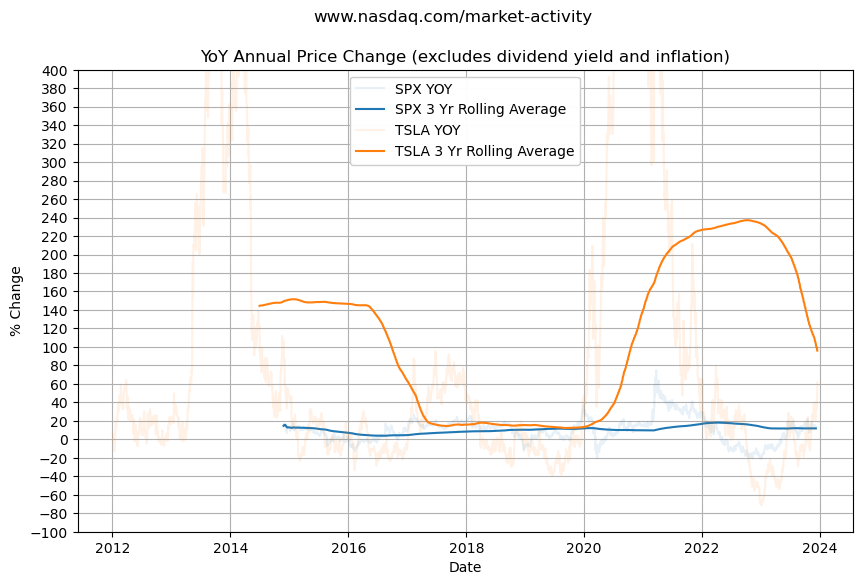

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(dfSpx.index, dfSpx['YoY Change'], label='SPX YOY', color='#1f77b4', alpha=0.1)
plt.plot(dfSpx.index, dfSpx['3 Yr Rolling Avg'], label='SPX 3 Yr Rolling Average', color='#1f77b4')
plt.plot(dfTsla.index, dfTsla['YoY Change'], label='TSLA YOY', color='#ff7f0e', alpha=0.1)
plt.plot(dfTsla.index, dfTsla['3 Yr Rolling Avg'], label='TSLA 3 Yr Rolling Average', color='#ff7f0e')
plt.xlabel('Date')
plt.ylabel('Annual % Change')
plt.suptitle('www.nasdaq.com/market-activity')
plt.title('YoY Annual Price Change (excludes dividend yield and inflation)')
plt.grid(True)
plt.yticks(range(-100, 1000, 20))
plt.ylim(bottom=-100, top=400) 
#plt.axhline(y=0, color='darkred')  # Add horizontal line at y=0
legend = plt.legend(loc='best')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
plt.show()